# 1. Data processing 

In [374]:
# Import needed moduls

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [375]:
# Load data

titanic_train = pd.read_csv("../data/titanic/train.csv")
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [376]:
# Delete no needed (for my opinion) columns

titanic_train.drop(labels=["PassengerId", "Name", "Ticket", "Cabin"], axis=1, inplace=True)
titanic_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [377]:
# Check the data to find gaps

titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [379]:
# Fill "Age" column nones by mean value

titanic_train["Age"].fillna(titanic_train["Age"].mean(), inplace=True)

# No split data for Train and test yet, and I know that necessary 
# to filling gaps each sample differently (mean() at least)

# Check result and other gaps

print(titanic_train["Age"].isna().sum())
titanic_train.info()

0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [380]:
# Check mode for object column to fill gaps
# Fill gaps and check result

titanic_train["Embarked"].fillna(titanic_train["Embarked"].mode()[0], inplace=True)
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [381]:
# Check resulting dataframe

titanic_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [382]:
# Converting categorical string feature to binominal integer

titanic_train["Sex"] = titanic_train["Sex"].apply(lambda x: 1 if x=="male" else 0)
titanic_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S


In [383]:
# Normalization
# If will be used machine learning algorithms are sensitive to feature scaling

# from sklearn.preprocessing import minmax_scale

# titanic_train[["Age", "Fare"]] = minmax_scale(titanic_train[["Age", "Fare"]])
# titanic_train.head()

In [384]:
# Convert categorical features to few binominal

titanic_train = pd.concat([titanic_train, 
                           pd.get_dummies(titanic_train["Pclass"], prefix='Class'),
                           pd.get_dummies(titanic_train["Embarked"], prefix='Embarked')],
                           axis=1)
titanic_train.drop(["Embarked", "Pclass"], axis=1, inplace=True)


In [385]:
# Check final view dataframe befor data spliting and fitting model

titanic_train.head()

,Survived,Sex,Age,SibSp,Parch,Fare,Class_1,Class_2,Class_3,Embarked_C,Embarked_Q,Embarked_S
0,0,1,22.0,1,0,7.2500,0,0,1,0,0,1
1,1,0,38.0,1,0,71.2833,1,0,0,1,0,0
2,1,0,26.0,0,0,7.9250,0,0,1,0,0,1
3,1,0,35.0,1,0,53.1000,1,0,0,0,0,1
4,0,1,35.0,0,0,8.0500,0,0,1,0,0,1


# 2. Choose and train model

In [386]:
# Splitting the dataset on training and testing

from sklearn.model_selection import train_test_split

np.random.seed(42)

X = titanic_train.drop("Survived", axis=1)
y = titanic_train["Survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [387]:
# Choose simlest model (for understanding) - RandomForestClassifier

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

In [388]:
# Fit the model

clf.fit(X_train, y_train);

In [389]:
# Check score of our model (mean accuracy in this case)

clf.score(X_test, y_test)

0.8100558659217877

Accuracy of our model with standard parameters is ~ **81%**

# 3. Experiments with model hyperparams

In [393]:
# Check different params (n_estimators and tree_depth) and choose best of them

# Create array of [score, n_estimators, max_deoth] elements

a = np.array([[0, 0, 0]])

for i in range(1, 201, 1):
    for j in range(1, 123, 5):
        np.random.seed(42)
        model = RandomForestClassifier(n_estimators=i, max_depth=j).fit(X_train, y_train)
        a = np.append(a, [[round(model.score(X_test, y_test)* 100,3), i, j]], axis=0)

# Print the best score and params

a[np.where(a == a[:,0].max())[0][0]]

array([84.358, 73.   , 11.   ])

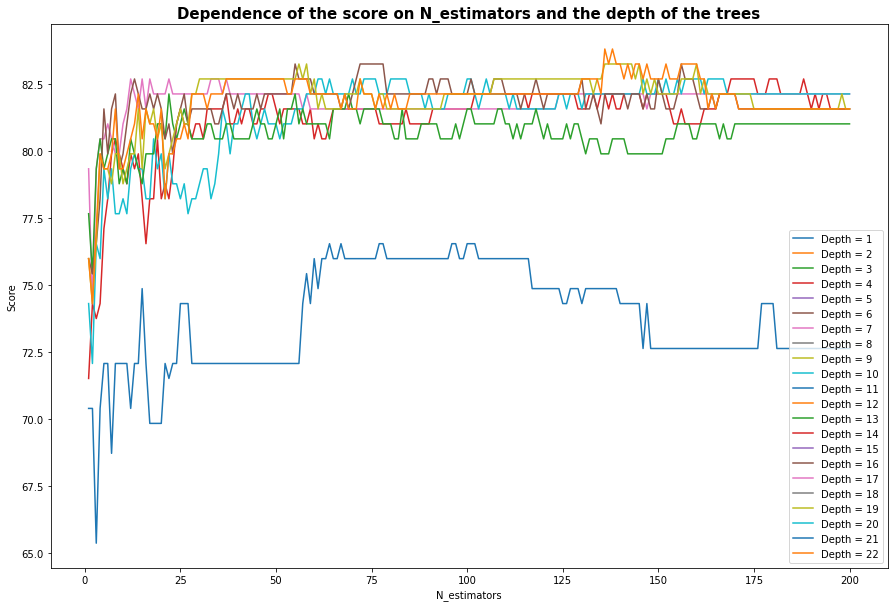

In [392]:
# Drawing of the figure with the dependence of the score on N_estimators and the depth of the trees
plt.subplots(figsize=(15, 10))

# Drawing different plots
for i in range(1, int((a[:,2].max()+1))):
    plt.plot(a[np.where(a[:,2] ==i)][:, 1], a[np.where(a[:,2] ==i)][:, 0], label=f"Depth = {i}")

# Decorating the plot
plt.legend()
plt.xlabel("N_estimators")
plt.ylabel("Score")
plt.title("Dependence of the score on N_estimators and the depth of the trees", fontsize=15, fontweight='bold');


In [367]:
# Fitting the best model and check score

np.random.seed(42)
model = RandomForestClassifier(n_estimators=int(a[np.where(a == a[:,0].max())[0][0]][1]), 
                               max_depth=int(a[np.where(a == a[:,0].max())[0][0]][2])).fit(X_train, y_train)

round(model.score(X_test, y_test) * 100,2)

84.92

Accuracy of our model tuned model is almost **85%**. 
Greate!!!

In [368]:
# Load the test and valid data

titanic_test = pd.read_csv("../data/titanic/test.csv")
y_valid = pd.read_csv("../data/titanic/gender_submission.csv", index_col = 0).squeeze("columns")
titanic_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [369]:
# Same transformations as on train dataset

# Delete no needed (for my opinion) columns
titanic_test.drop(labels=["PassengerId", "Name", "Ticket", "Cabin"], axis=1, inplace=True)

# Fill "Age" and "Fare"column nones by mean value
titanic_test["Age"].fillna(titanic_test["Age"].mean(), inplace=True)
titanic_test["Fare"].fillna(titanic_test["Fare"].mean(), inplace=True)

# Fill "Embarked" column nones by mode value
titanic_test["Embarked"].fillna(titanic_test["Embarked"].mode()[0], inplace=True)

# Converting categorical string feature to binominal integer
titanic_test["Sex"] = titanic_test["Sex"].apply(lambda x: 1 if x=="male" else 0)

# Convert categorical features to few binominal
titanic_test = pd.concat([titanic_test, 
                           pd.get_dummies(titanic_test["Pclass"], prefix='Class'),
                           pd.get_dummies(titanic_test["Embarked"], prefix='Embarked')],
                           axis=1)
titanic_test.drop(["Embarked", "Pclass"], axis=1, inplace=True)

In [370]:
titanic_test.head()

,Sex,Age,SibSp,Parch,Fare,Class_1,Class_2,Class_3,Embarked_C,Embarked_Q,Embarked_S
0,1,34.5,0,0,7.8292,0,0,1,0,1,0
1,0,47.0,1,0,7.0000,0,0,1,0,0,1
2,1,62.0,0,0,9.6875,0,1,0,0,1,0
3,1,27.0,0,0,8.6625,0,0,1,0,0,1
4,0,22.0,1,1,12.2875,0,0,1,0,0,1


In [371]:
# Check score of our model on test data

model.score(titanic_test, y_valid)

0.8373205741626795

In [372]:
# Create resulting dataframe with predictions

result_predictions = pd.DataFrame({"PassengerId":np.arange(892, 1310),
                                   "Survived" : model.predict(titanic_test)})
result_predictions

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [373]:
# Save result to csv file

result_predictions.to_csv("../data/titanic/my_first_predictions.csv", index=False)